In [12]:
from mpl_toolkits import mplot3d
import numpy as np
from numpy.linalg import eig, inv
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd
from scipy.spatial import Delaunay, ConvexHull
import cv2 as cv

Consts

In [2]:
colormap = 'rainbow'
colour = ['black', 'gray', 'red', 'orange', 'green', 'slateblue',
            'sandybrown', 'lightpink', 'hotpink', 'gold']
sampling_size = 34
N = 300

In [3]:
data = pd.read_json('C:\\Users\\talro\\OneDrive\\Documents\\tentacle1-10points.json')
data.head()

,0,1,2,3,4,5,6,7,8,9
0,"[0.43178376555442805, -0.34551641345024103, 8....","[1.34491741657257, -0.028944784775376, 8.26284...","[0.7934380173683161, 0.296221613883972, 8.2628...","[1.292644739151001, 0.030703168362379, 8.26284...","[1.233581185340881, 0.08764001727104101, 8.262...","[0.31765389442443803, -0.093885488808155, 8.26...","[0.9812343716621391, 0.24649487435817702, 8.26...","[0.573100328445434, -0.480023175477981, 8.2628...","[1.388440608978271, -0.088931940495967, 8.2628...","[1.169671058654785, 0.139419227838516, 8.26284..."
1,"[0.17141613364219602, 0.255552738904953, 8.012...","[1.162960886955261, 0.084494166076183, 8.01284...","[0.43912422657012906, -0.450698643922805, 8.01...","[1.251018524169921, -0.115198172628879, 8.0128...","[0.673097968101501, -0.536989450454711, 8.0128...","[1.026657819747924, 0.24328950047492903, 8.012...","[0.666472733020782, 0.42295104265213, 8.012846...","[0.371562063694, -0.40900412201881403, 8.01284...","[0.166553542017936, -0.18858282268047302, 8.01...","[0.89284348487854, -0.5495918393135071, 8.0128..."
2,"[0.152179211378097, 0.48737594485282904, 7.762...","[0.646083772182464, 0.49543544650077803, 7.762...","[0.693247556686401, -0.467338889837265, 7.7628...","[-0.051224313676357006, -0.047384351491928, 7....","[0.273504823446273, 0.5302662849426271, 7.7628...","[-0.079201407730579, 0.087251678109169, 7.7628...","[0.17719984054565402, -0.33646216988563504, 7....","[0.8227881193161011, -0.434150993824005, 7.762...","[0.49509337544441206, 0.536140859127044, 7.762...","[0.8809147477149961, -0.407735139131546, 7.762..."
3,"[0.818208277225494, -0.255706131458282, 7.5128...","[-0.06849020719528101, 0.522590816020965, 7.51...","[-0.199775591492652, 0.35795235633850103, 7.51...","[0.19518209993839203, 0.628592073917388, 7.512...","[-0.16449142992496402, 0.42036917805671603, 7....","[0.122999250888824, 0.6149860024452211, 7.5128...","[0.912369132041931, -0.08819666504859901, 7.51...","[0.9215986132621761, 0.10550031810998901, 7.51...","[0.706867516040802, 0.47002038359642, 7.512846...","[0.054276935756206006, 0.592647552490234, 7.51..."
4,"[0.7242580056190491, 0.37992987036705, 7.26284...","[0.683939218521118, 0.441160202026367, 7.26284...","[-0.13926164805889102, -0.236357152462005, 7.2...","[0.31189948320388705, -0.36629834771156305, 7....","[-0.012104030698537, 0.6854194402694701, 7.262...","[0.45409354567527704, -0.339038789272308, 7.26...","[0.37458032369613603, 0.6702088117599481, 7.26...","[0.080243036150932, -0.34180802106857305, 7.26...","[-0.20535141229629503, 0.585532486438751, 7.26...","[-0.19900506734848, -0.18717221915721802, 7.26..."


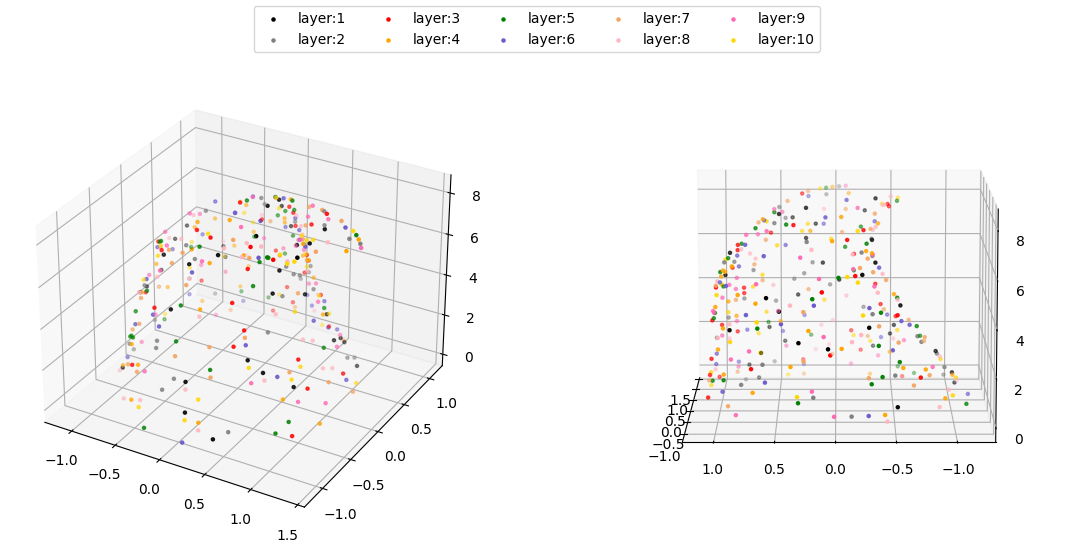

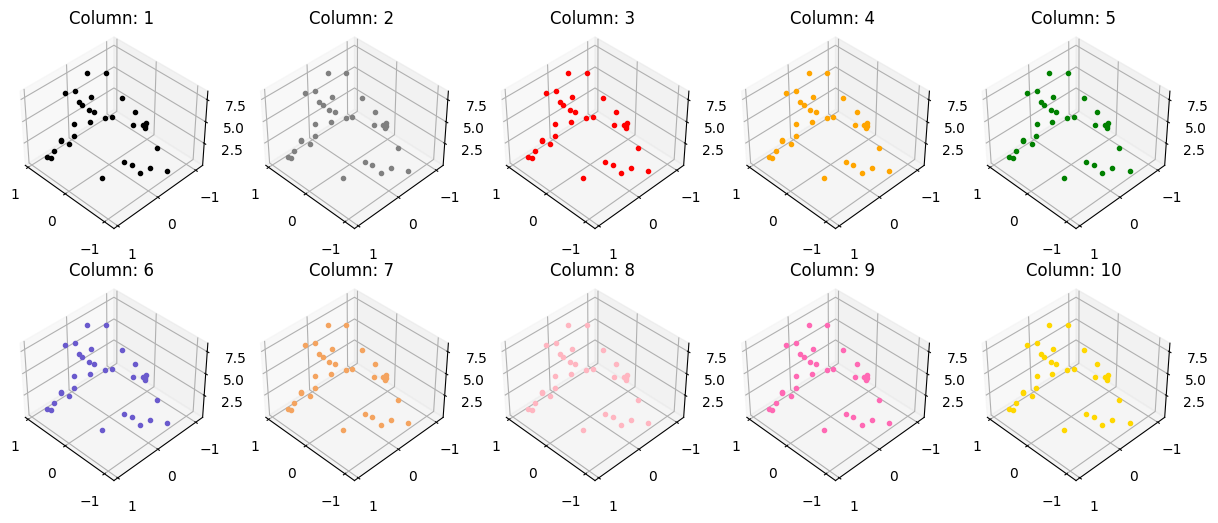

In [4]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax0 = fig.add_subplot(1, 2, 2, projection='3d')
fig1 = plt.figure(figsize=(15,6))
x_lst = []
y_lst = []
z_lst = []
vals = []
legend = []
j = 0
for index in data:
    figure = []
    ax1 = fig1.add_subplot(2, 5, j+1, projection='3d')
    for i in data[index]:
        figure.append(i)
    xline = [i[0] for i in figure]
    yline = [i[1] for i in figure]
    zline = [i[2] for i in figure]
    for k in figure:
        x_lst.append(k[0])
        y_lst.append(k[1])

        vals.append([k[0], k[1], k[2]])
        z_lst.append(k[2])

    for point in range(sampling_size):
        # ax1.plot(xline[point], yline[point], zline[point], marker='.', color=colour[j])
        ax1.plot(x_lst[point], y_lst[point], z_lst[point], marker='.', color=colour[j])
        ax1.set_title("Column: " + str(j+1))
    legend.append("layer:" + str(j+1))
    ax1.view_init(40, 135)
    ax.scatter3D(x_lst[j*sampling_size:j*sampling_size+sampling_size], y_lst[j*sampling_size:j*sampling_size+sampling_size], z_lst[j*sampling_size:j*sampling_size+sampling_size], marker='.', color=colour[j])
    ax0.scatter3D(x_lst[j*sampling_size:j*sampling_size+sampling_size], y_lst[j*sampling_size:j*sampling_size+sampling_size], z_lst[j*sampling_size:j*sampling_size+sampling_size], marker='.', color=colour[j])
    
    j+=1
fig.legend(legend, loc="upper center", ncol=int((len(legend)+1)/2))
ax0.view_init(10, 180)

<AxesSubplot: xlabel='count'>

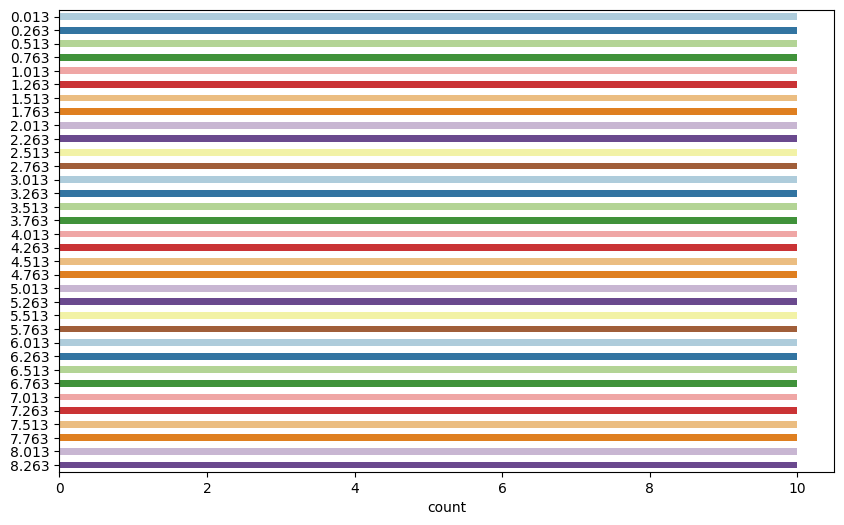

In [5]:
import seaborn as sns
kwargs = ['height', 5]
sns.countplot(y=np.round(vals, 3)[:, 2], width=0.5, figure=plt.figure(figsize=(10,6)), palette='Paired')

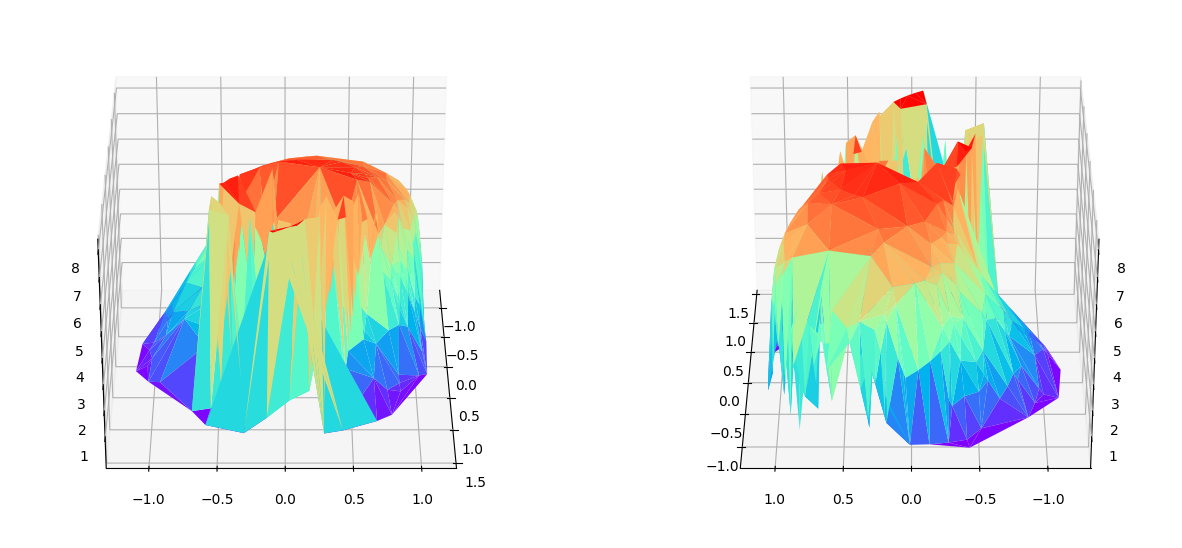

In [6]:
# Default triangulation
z_unique_values = np.unique(z_lst)
tr = Delaunay(vals, furthest_site=True)
fig2 = plt.figure(figsize=(15, 8))
ax2 = fig2.add_subplot(1, 2, 1, projection='3d')
ax2.plot_trisurf(x_lst, y_lst, z_lst, triangles=tr.simplices, cmap=colormap)
ax2.view_init(30, 0)
ax3 = fig2.add_subplot(1, 2, 2, projection='3d')
ax3.plot_trisurf(x_lst, y_lst, z_lst, triangles=tr.simplices, cmap=colormap)
ax3.view_init(30, 180)

In [13]:
def fitEllipse(x,y):
    x = x[:,np.newaxis]
    y = y[:,np.newaxis]
    D =  np.hstack((x*x, x*y, y*y, x, y, np.ones_like(x)))
    S = np.dot(D.T,D)
    C = np.zeros([6,6])
    C[0,2] = C[2,0] = 2; C[1,1] = -1
    E, V =  eig(np.dot(inv(S), C))
    n = np.argmax(np.abs(E))
    a = V[:,n]
    return a

def ellipse_center(a):
    b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
    num = b*b-a*c
    x0=(c*d-b*f)/num
    y0=(a*f-b*d)/num
    return np.array([x0,y0])


def ellipse_angle_of_rotation( a ):
    b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
    return 0.5*np.arctan(2*b/(a-c))


def ellipse_axis_length( a ):
    b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
    up = 2*(a*f*f+c*d*d+g*b*b-2*b*d*f-a*c*g)
    down1=(b*b-a*c)*( (c-a)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
    down2=(b*b-a*c)*( (a-c)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
    res1=np.sqrt(up/down1)
    res2=np.sqrt(up/down2)
    return np.array([res1, res2])

def ellipse_angle_of_rotation2( a ):
    b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
    if b == 0:
        if a > c:
            return 0
        else:
            return np.pi/2
    else: 
        if a > c:
            return np.arctan(2*b/(a-c))/2
        else:
            return np.pi/2 + np.arctan(2*b/(a-c))/2

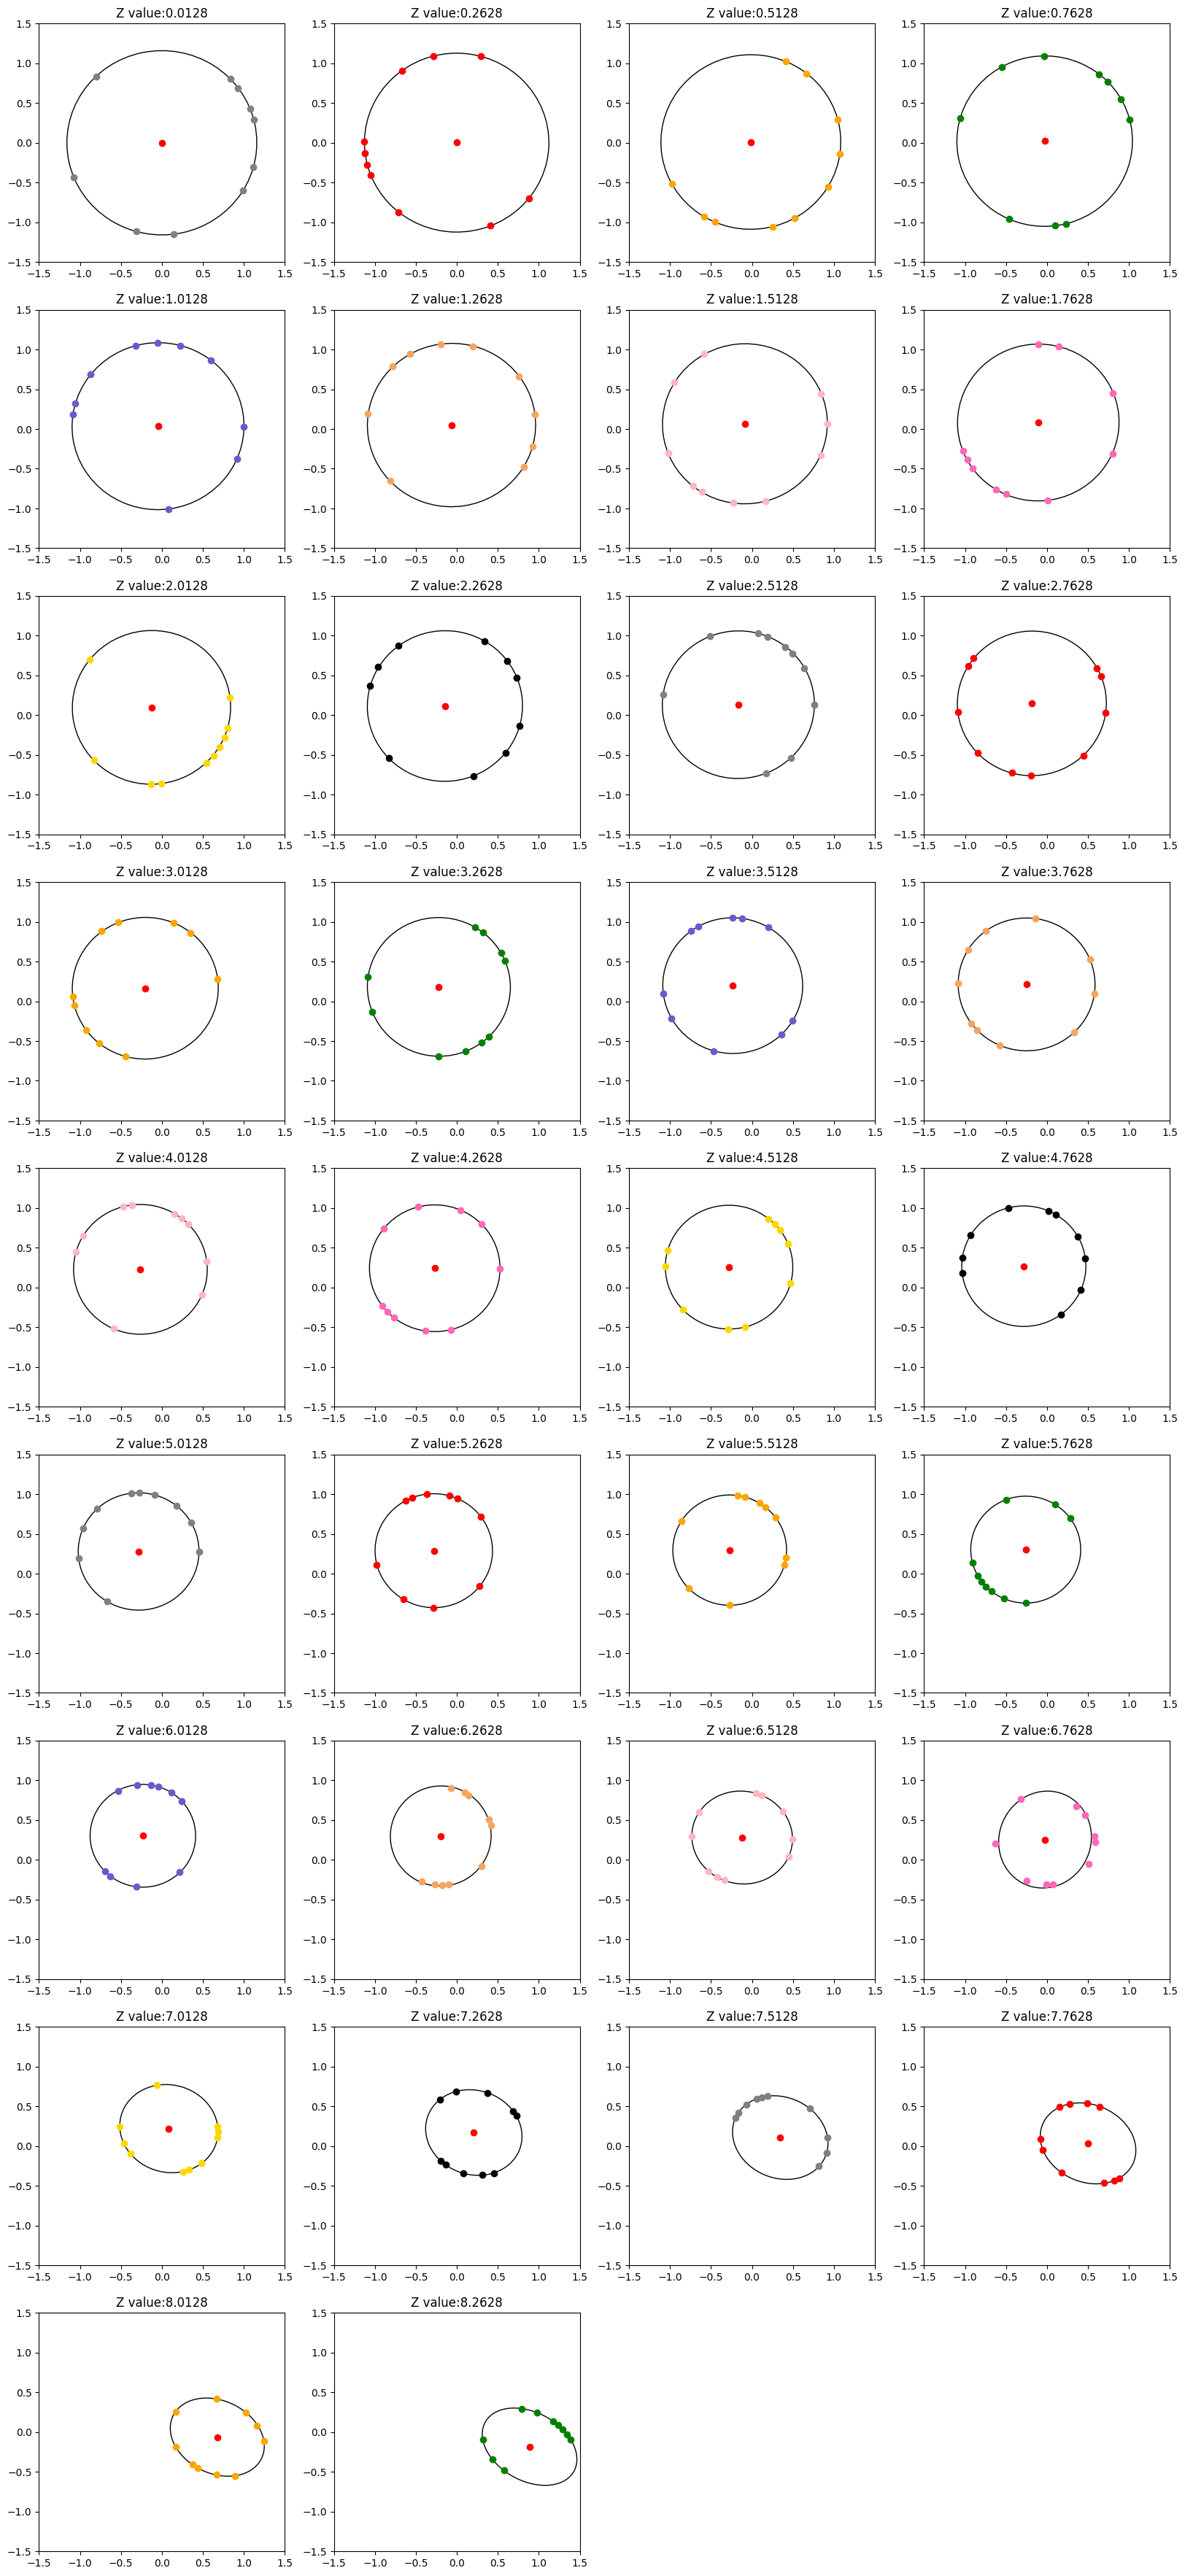

In [29]:
vals = np.array(vals)
z_unique_values = np.unique(vals[:, 2])

ticks = [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]
k = 1
fig_size_scale = 5
fig = plt.figure(figsize=(4*fig_size_scale,9*fig_size_scale))
for layer in z_unique_values:
    ax = fig.add_subplot(9, 4, k)
    relevant_points = vals[vals[:, 2] == layer][:, :2]
    if len(relevant_points) > 3:
        a = fitEllipse(relevant_points[:, 0], relevant_points[:, 1])
        center = ellipse_center(a)
        phi = ellipse_angle_of_rotation2(a)
        axes = ellipse_axis_length(a)
        a, b = axes
        ell = Ellipse(center, 2 * a, 2 * b,  angle=phi * 180 / np.pi, fill=False) 
        ax.add_artist(ell)
        ell.set_clip_box(ax.bbox)
        ax.set_title("Z value:" + str(round(layer, 4)))
        ax.scatter(center[0], center[1], color='red')

    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.scatter(relevant_points[:, 0], relevant_points[:, 1], color=colour[k%len(colour)])
    k += 1
    

Series of circles with descending radius and ellipses